Отдельный ноутбук для визуализаций придуманых Гариком

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pickle
import pandas as pd
from pprint import pprint

In [85]:
numbers = pd.read_pickle('total_morphemes.pickle')
numbers.head()

,morpheme,gloss,pos,s_count,k_count,s_expected,k_expected,log_l,ell
37,WEːČ,gnr,v,335.0,1891.0,1342.468141,883.531859,1947.801162,0.003477
4,Gr(E),hab,v,1747.0,41.0,1078.316728,709.683272,1452.048547,0.002678
7,RI,pst,v,1308.0,2712.0,2424.403381,1595.596619,1262.801694,0.002073
3,čE,pf.ptc,v,1895.0,211.0,1270.097891,835.902109,935.525501,0.001684
17,D,prog,v,765.0,1675.0,1471.528420,968.471580,834.398174,0.001470


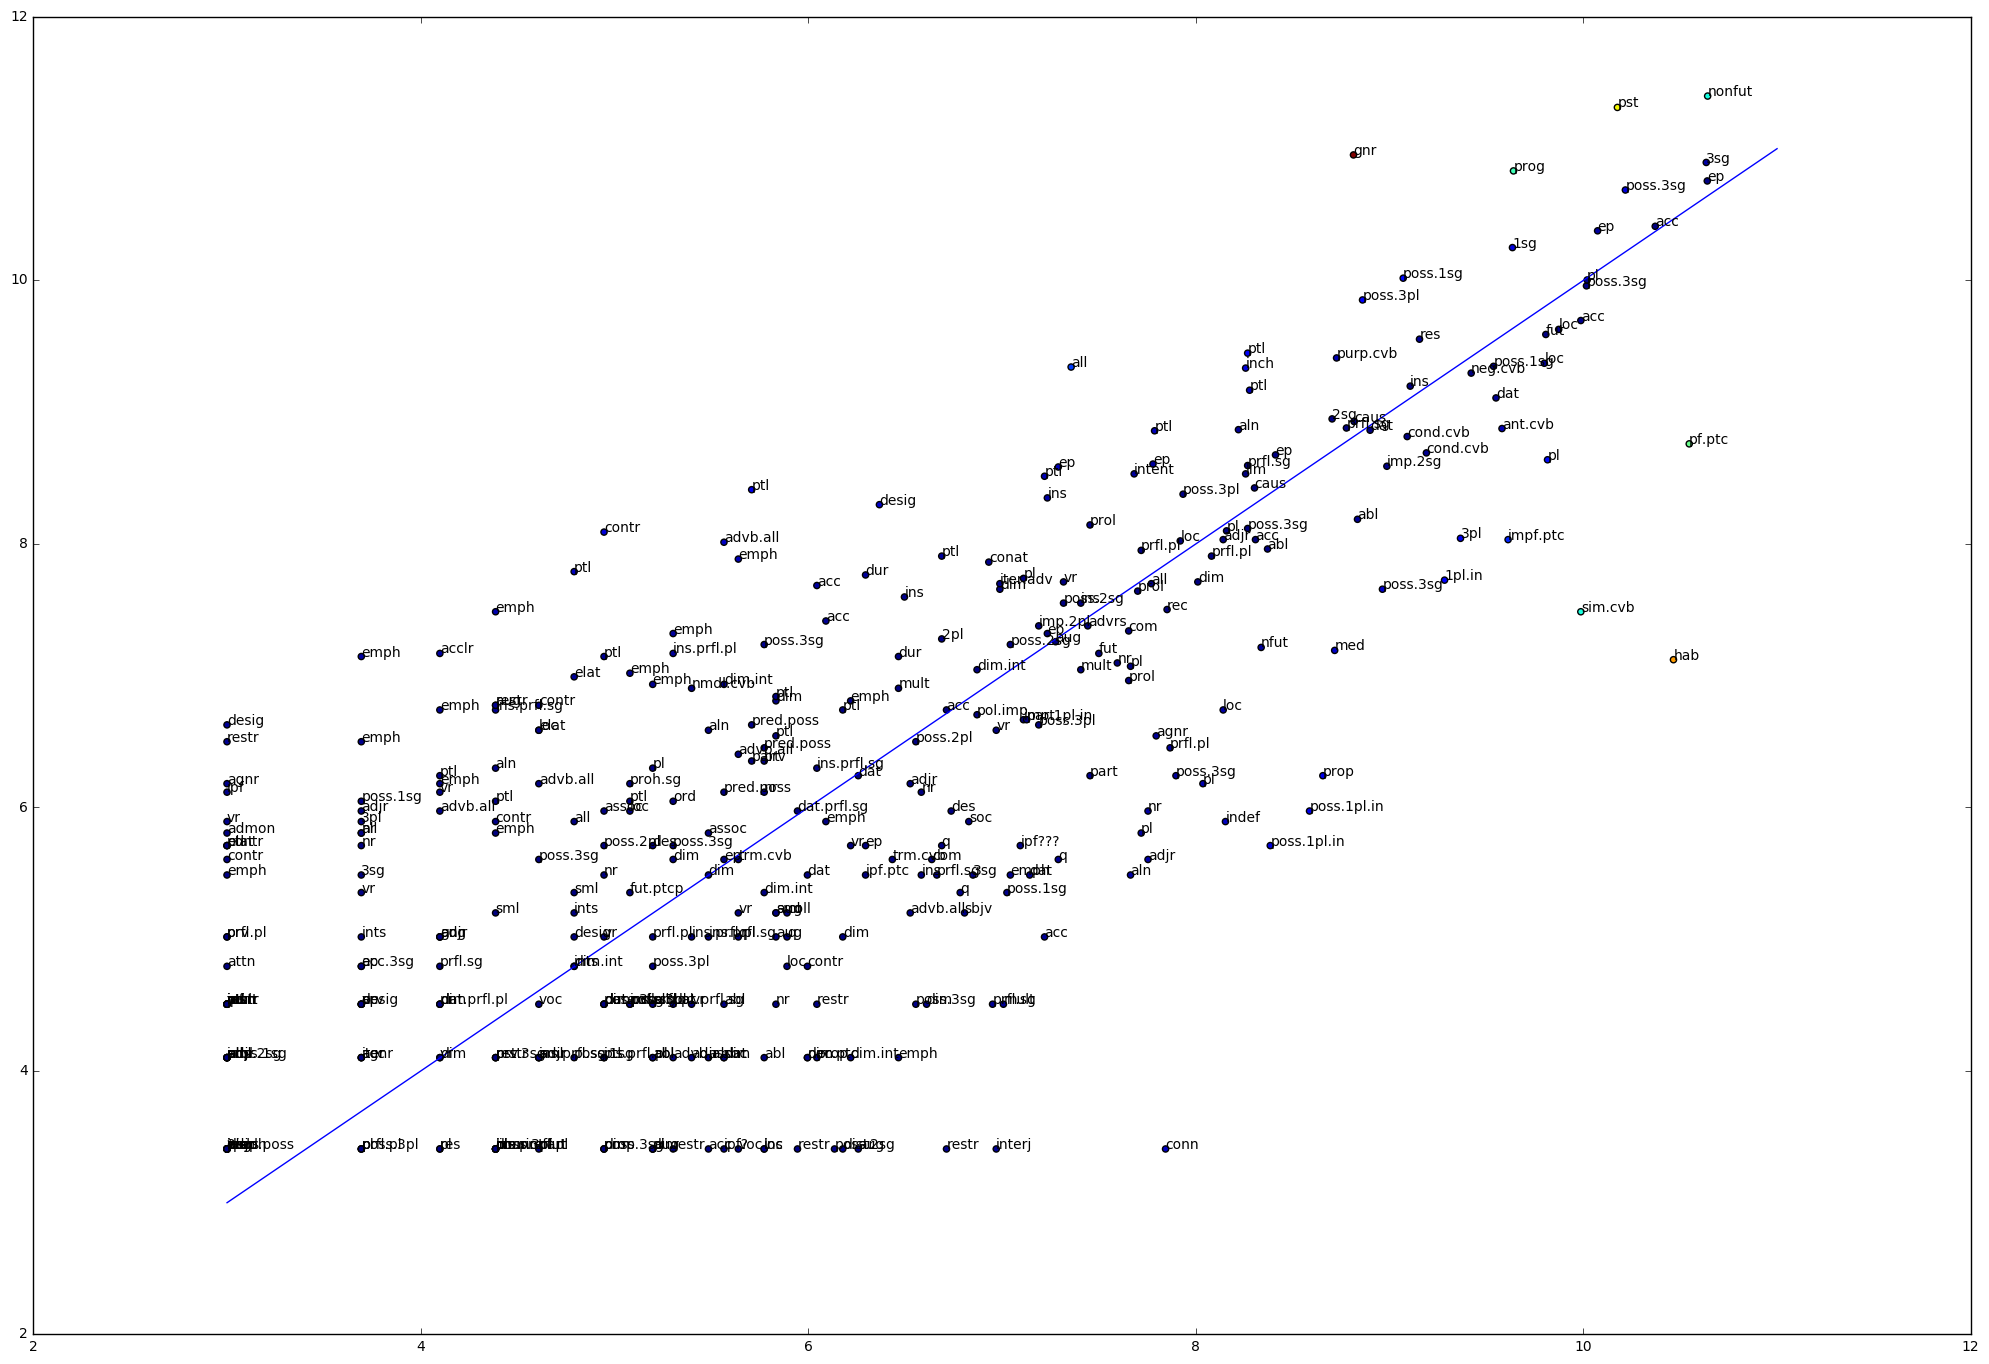

In [96]:
numbers['s_freq'] = numbers['s_count']*1000000/49800
numbers['k_freq'] = numbers['k_count']*1000000/33112
# numbers['s'] = [1 if x>0 else 0 for x in numbers['s_count']]
# numbers['k'] = [1 if x>0 else 0 for x in numbers['k_count']]
# numbers['both'] = numbers['s'] + numbers['k']
# del numbers['s']
# del numbers['k']
# numbers['s_tfidf'] = (1 + np.log(numbers['s_count'])) # * np.log(2/numbers['both'])
# numbers['k_tfidf'] = (1 + np.log(numbers['k_count'])) # * np.log(2/numbers['both'])
# tfidf = np.maximum(numbers['s_tfidf'], numbers['k_tfidf'])

ll = numbers['log_l']
numbers = numbers.sort_values(['s_freq', 'k_freq'])

s_freq = np.log(np.array(numbers['s_freq']))
k_freq = np.log(np.array(numbers['k_freq']))
labels = np.array(numbers['gloss'])

colors = cm.rainbow(np.linspace(0, 1, len(k_freq)))
fig, ax = plt.subplots(figsize=(25, 17))
ax.scatter(s_freq, k_freq, c=ll)
# for y, c in zip(k_freq, colors):
#     plt.scatter(s_freq, y, color=c)


for i, txt in enumerate(labels):
    ax.annotate(txt, (s_freq[i], k_freq[i]))

plt.plot(np.arange(3, np.max(k_freq)), np.arange(3, np.max(k_freq)))
plt.show()

In [95]:
max(k_freq)

11.399451806603798

In [18]:
np.log(s_freq)

array([        -inf,         -inf,         -inf, ...,  10.57788577,
        10.62923021,  10.73342387])

In [ ]:
tf_idf

In [97]:
pairs = pd.read_pickle('pairs_by_ll.pickle')
len(pairs)

4036

In [98]:
pairs.head()

,1gloss,1morpheme,1pos,2gloss,2morpheme,2pos,s_count,k_count,s_expected,k_expected,log_l,ell
1558,gnr,WEːČ,v,nonfut,R(E),v,19.0,1506.0,919.705263,605.294737,2598.003320,0.004911
4680,prog,D,v,gnr,WEːČ,v,0.0,458.0,276.213122,181.786878,846.415309,0.001970
2445,sim.cvb,nIkEn,v,1,1,1,1039.0,34.0,647.110654,425.889346,812.034418,0.001624
999,pf.ptc,čE,v,1,1,1,1083.0,73.0,697.166743,458.833257,685.667361,0.001355
4769,poss.1pl.ex,WUn,v,1,1,1,0.0,327.0,197.208932,129.791068,604.318354,0.001504


In [104]:
pairs['1gloss']+'+'+pairs['2gloss']

TypeError: Can't convert 'int' object to str implicitly

In [101]:
pairs['s_freq'] = pairs['s_count']*1000000/49800
pairs['k_freq'] = pairs['k_count']*1000000/33112

pairs = pairs.sort_values(['s_freq', 'k_freq'])

s_freq = np.log(np.array(pairs['s_freq']))
k_freq = np.log(np.array(pairs['k_freq']))
labels = np.array(pairs['1gloss']+'+'+pairs['2gloss'])

ll = pairs['log_l']

fig, ax = plt.subplots(figsize=(25, 17))
ax.scatter(s_freq, k_freq, c=ll)

plt.plot(np.arange(3, np.max(k_freq)), np.arange(3, np.max(k_freq)))


for i, txt in enumerate(labels):
    ax.annotate(txt, (s_freq[i], k_freq[i]))

plt.show()

TypeError: Can't convert 'int' object to str implicitly

In [14]:
np.log(s_freq)

array([-10.81577026, -10.81577026, -10.81577026, ...,          nan,
                nan,          nan])